<a href="https://colab.research.google.com/github/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/blob/MUSKAN_202218037/Eda_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import missingno as msg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Loading dataset

In [2]:
# Reading a CSV file from a GitHub repository
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/dataset.csv")

In [3]:
# Display the shape of the dataset (number of rows and columns)
data.shape

(53392, 33)

**Our dataset contains 53,392 records and consists of 33 columns.**

In [4]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [5]:
#Fetching column names
col = data.columns
col

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

#EDA

## Visualizing missing data


<Axes: >

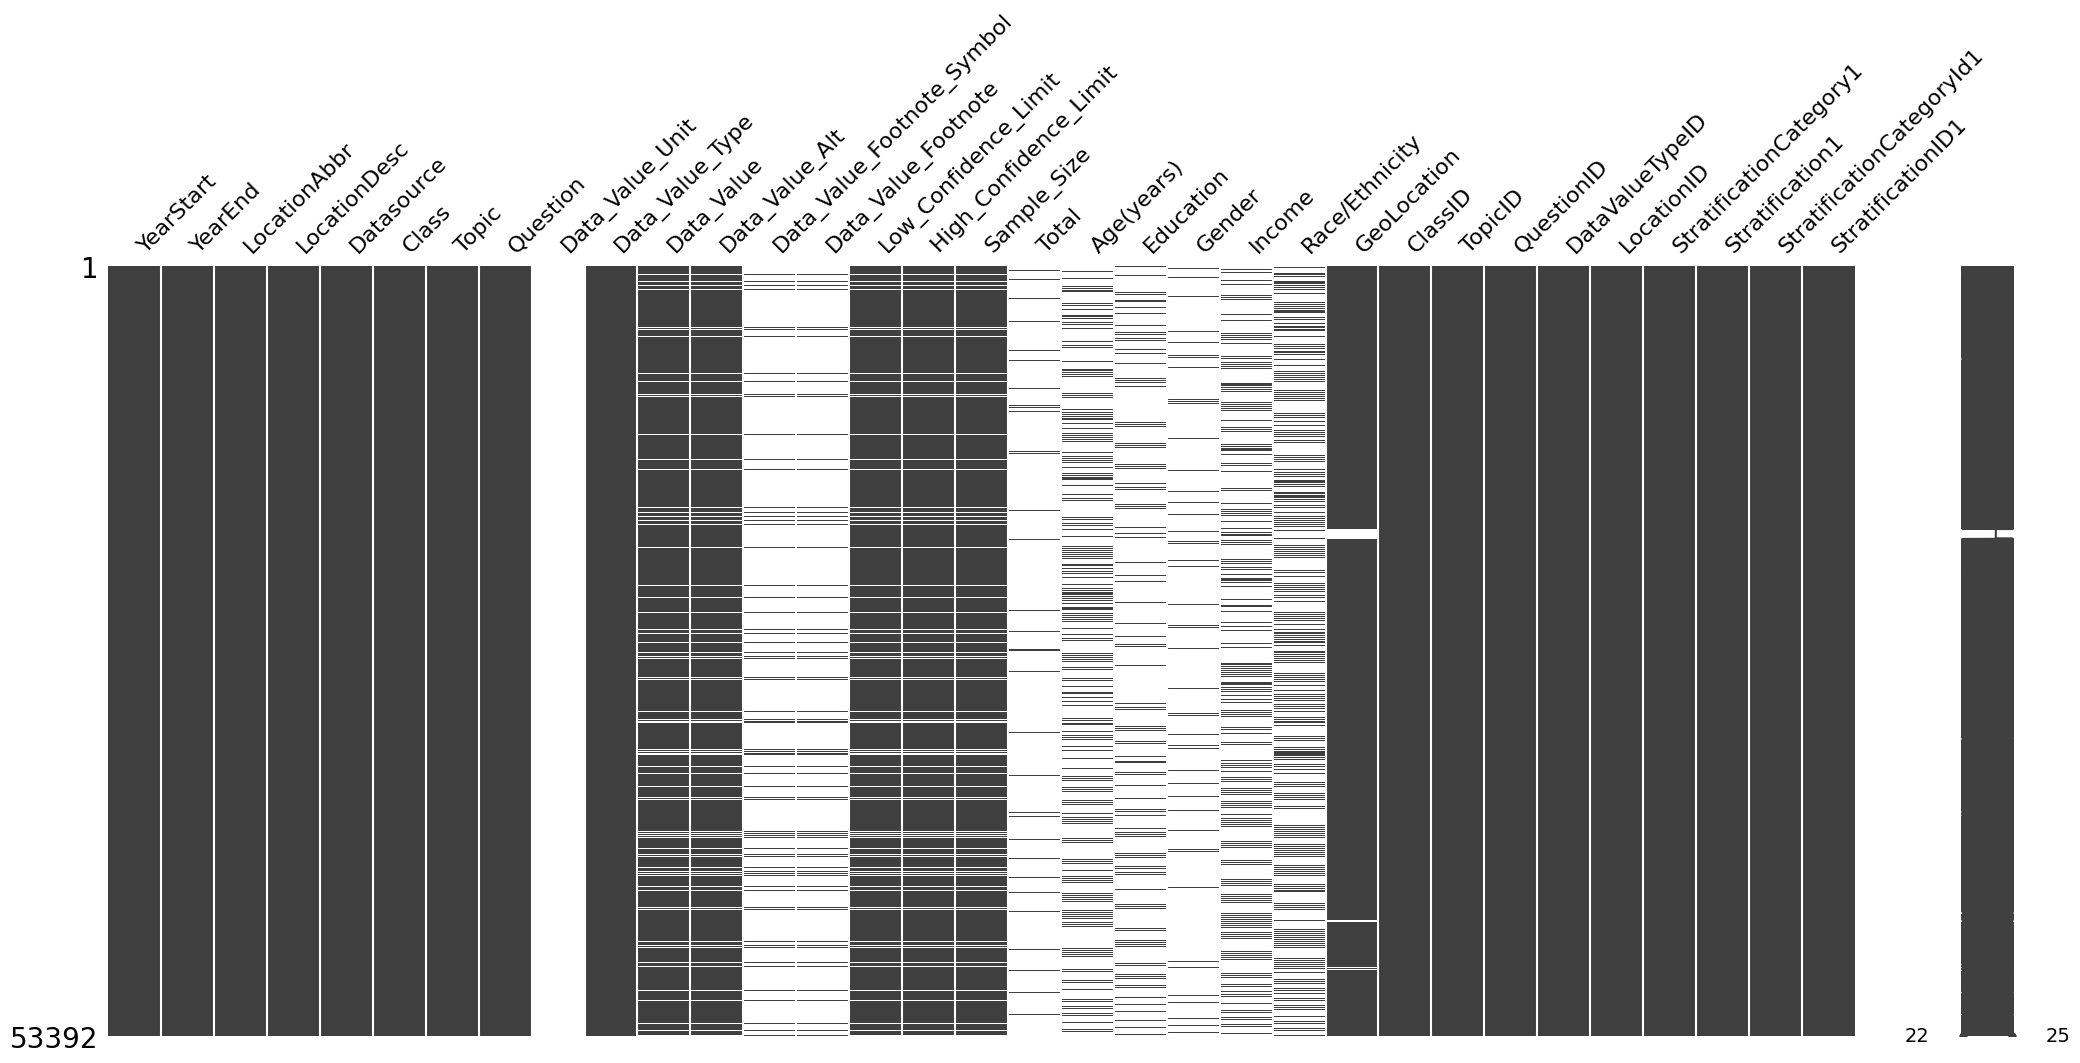

In [6]:
msg.matrix(data)

##Finding data types

In [7]:
data.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

##Histogram

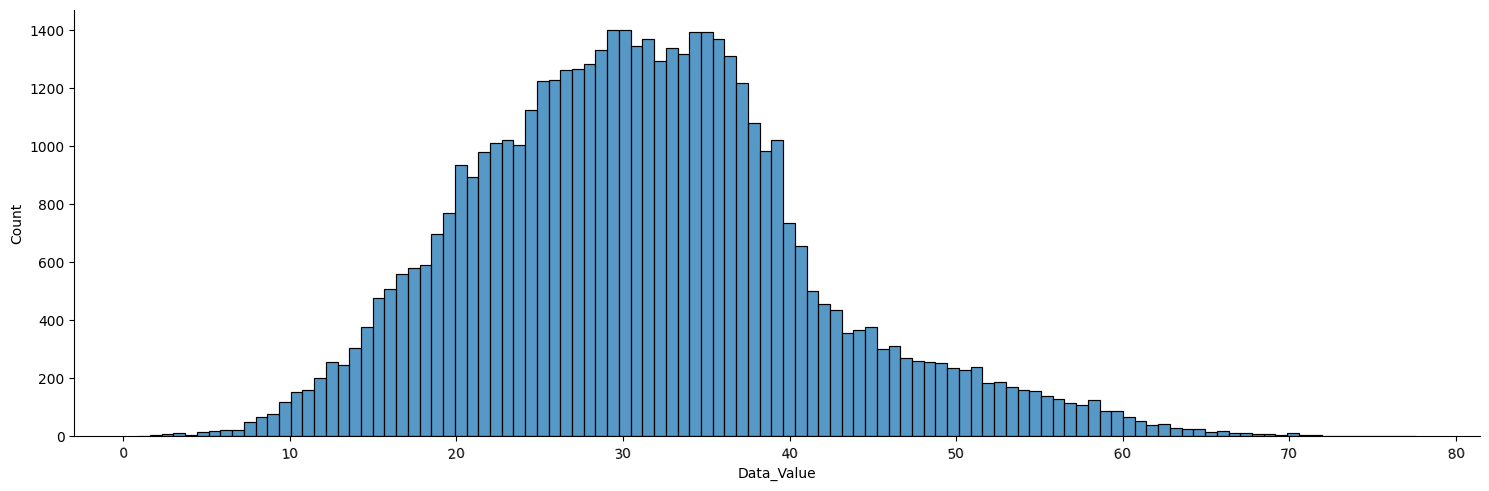

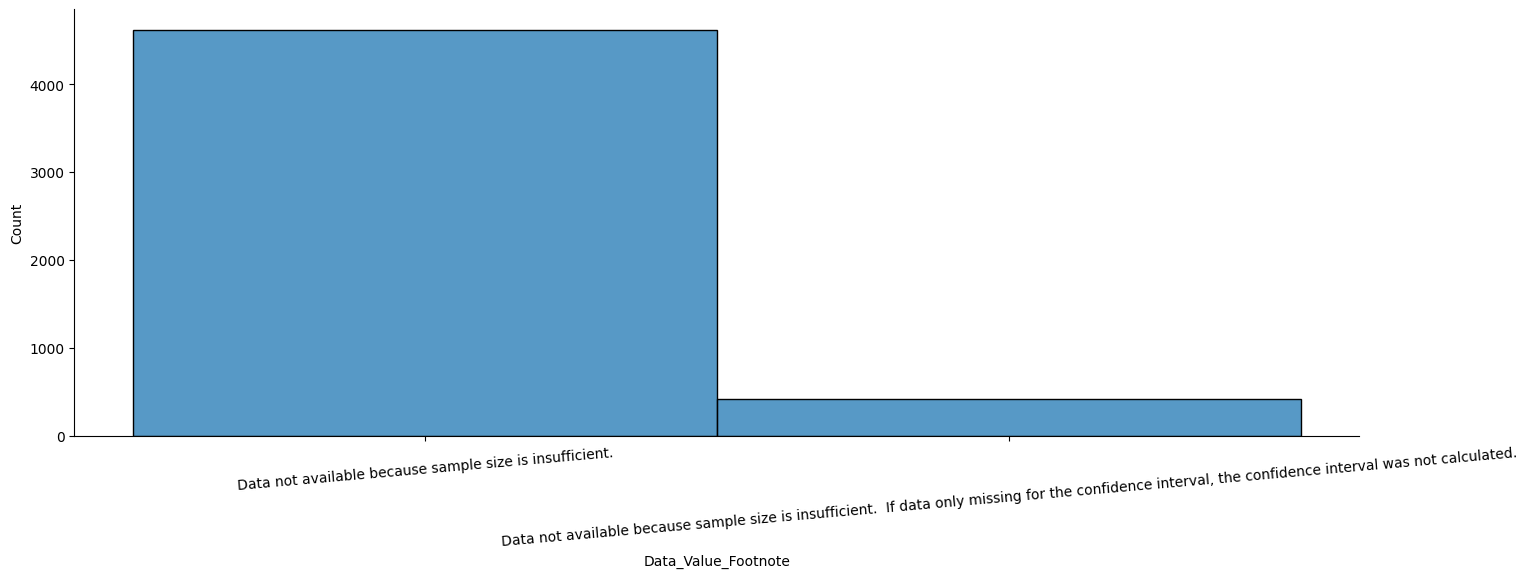

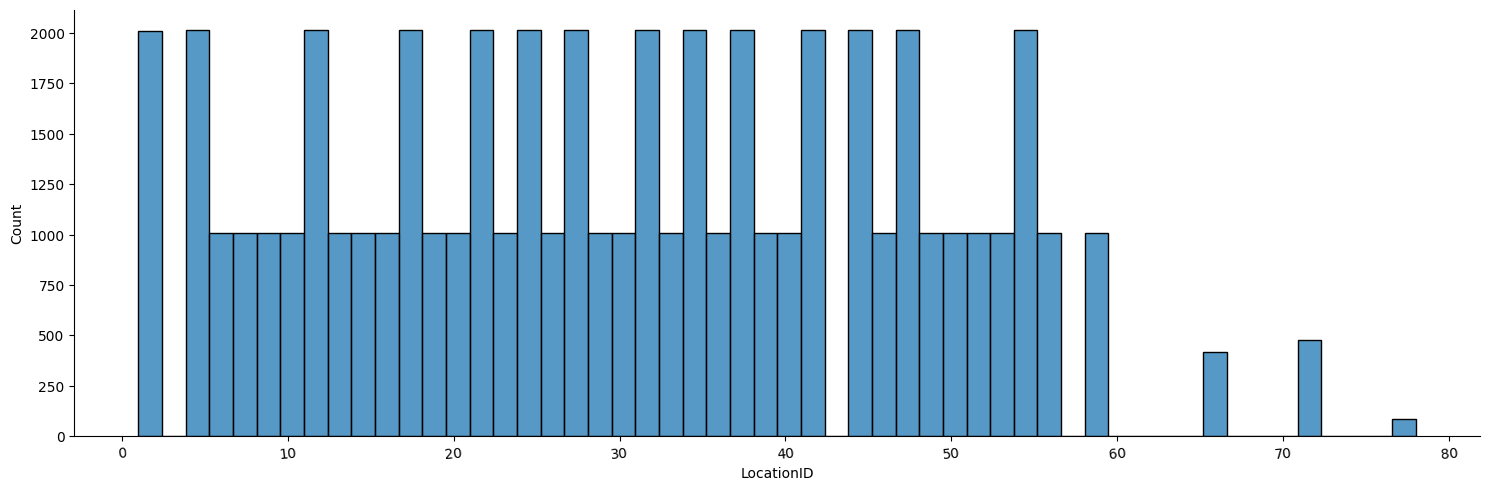

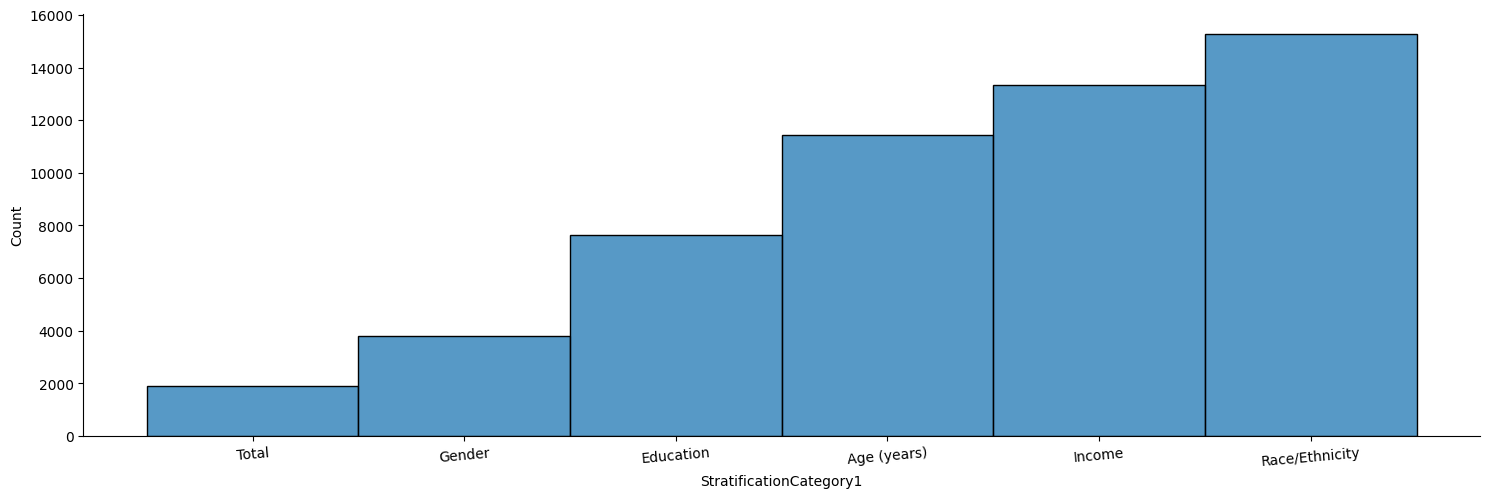

In [8]:
df=data[['Data_Value','Data_Value_Footnote','LocationID','StratificationCategory1']]
for col in df:
    sns.displot(df[col],height=5, aspect=3)
    plt.xticks(rotation=5)
    plt.show()

**Observation:**

This histogram provides insights into the distribution of instances based on Data_Value, Data_Value_Footnote, and LocationID.


*   Examining the Data_Value plot, we observe that it exhibits a frequency distribution that closely resembles a normal distribution.
*   The Data_Value_Footnote graph reveals that approximately 4500 instances lack data due to insufficient sample sizes, while for fewer than 500 instances, data is missing because confidence intervals cannot be calculated.
*   In the plot representing LocationIDs, we can observe variations in the frequency of records among different LocationIDs.
*   Analyzing the StratificationCategory1 plot, we observe variations in the number of records within all categories. Notably, Race/Ethnicity has the highest count, while Total exhibits the lowest count.

##Average obesity rates with respect to Location

<Figure size 1200x600 with 0 Axes>

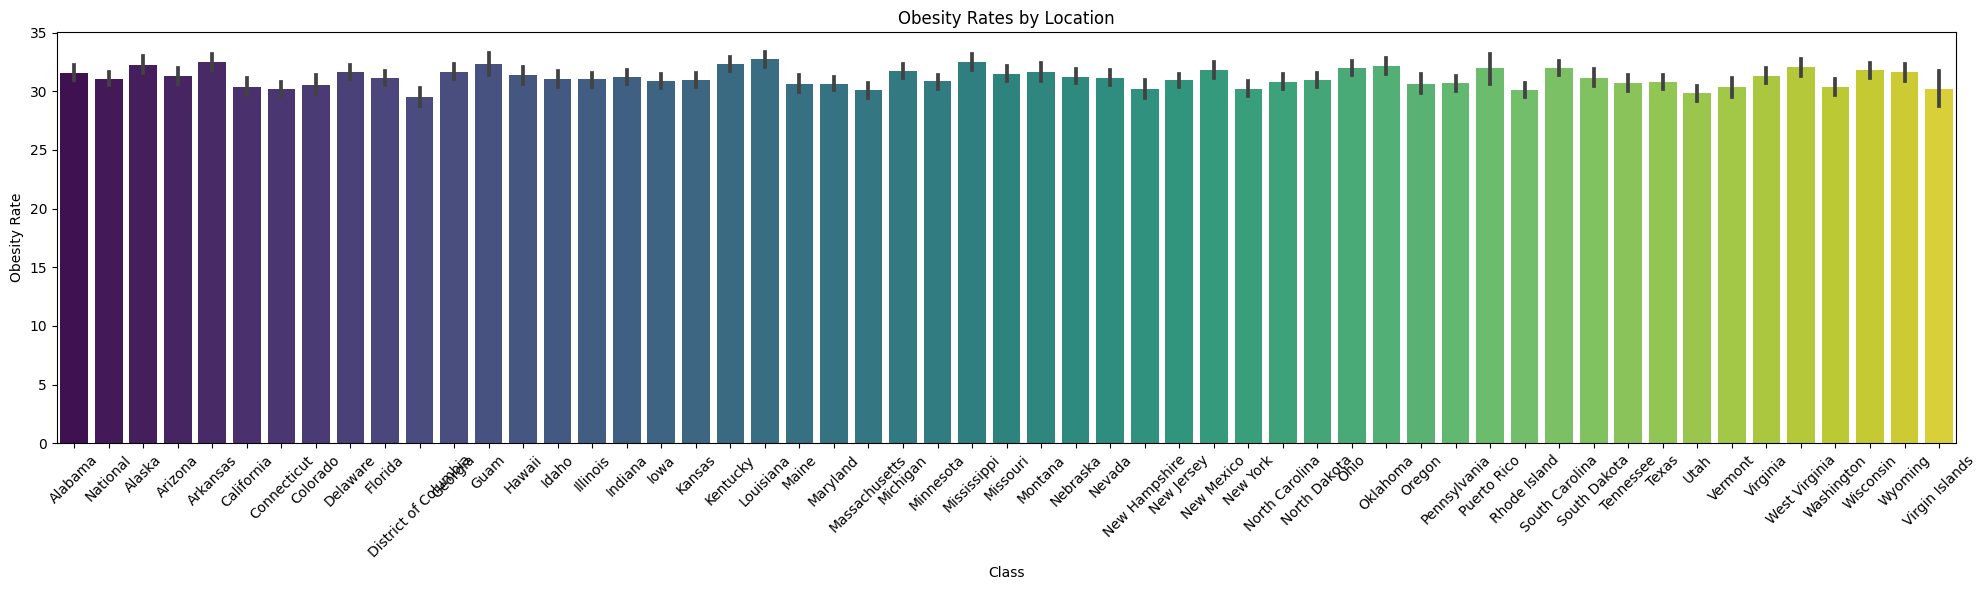

In [9]:
top_10_obesity = data.sort_values(by='Data_Value', ascending=False)
plt.figure(figsize=(12, 6))
plt.figure(figsize=(20, 6))
sns.barplot(x='LocationDesc', y='Data_Value', data=data, palette='viridis')
plt.title('Obesity Rates by Location')
plt.xlabel('Class')
plt.ylabel('Obesity Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

We've examined obesity rates across all states and found that the average obesity rates are predominantly centered around 30 for each state.

##- Displaying Top 10

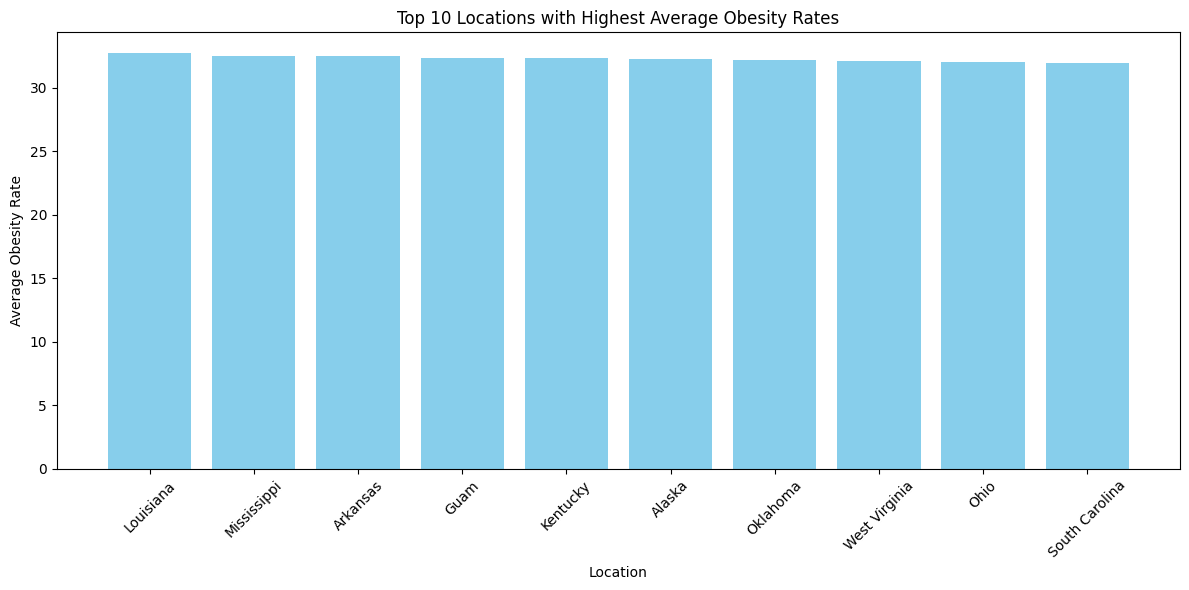

In [10]:
average_obesity_by_country = data.groupby('LocationDesc')['Data_Value'].mean().reset_index()
top_10_obesity = average_obesity_by_country.sort_values(by='Data_Value', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_obesity['LocationDesc'], top_10_obesity['Data_Value'], color='skyblue')
plt.title('Top 10 Locations with Highest Average Obesity Rates')
plt.xlabel('Location')
plt.ylabel('Average Obesity Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation**

To enhance comprehension, we have presented the top 10 states with the highest average obesity rates. It is evident that Louisiana has the highest obesity rate, followed by Mississippi, Arkansas, and so on.

##Obesity rate with respect to Class

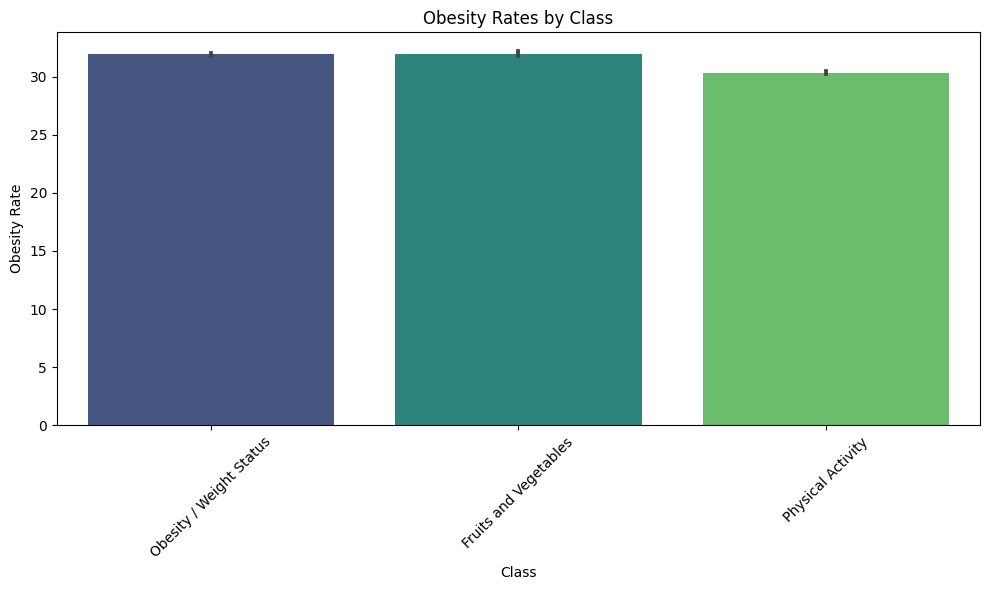

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Data_Value', data=data, palette='viridis')
plt.title('Obesity Rates by Class')
plt.xlabel('Class')
plt.ylabel('Obesity Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation:**

Within the three classes, it's notable that "Obesity/Weight Status" exhibits the highest average obesity rate, followed by "Fruits and Vegetables," and lastly "Physical Activity. One possible reason for this pattern could be that the "Obesity/Weight Status" class may include topics or questions related to obesity, which naturally have higher obesity rates as they are specifically focused on weight and related issues. On the other hand, "Fruits and Vegetables" and "Physical Activity" classes might involve healthier lifestyle choices and behaviors, which could contribute to lower obesity rates on average.

##Obesity rates with respect to StratificationID

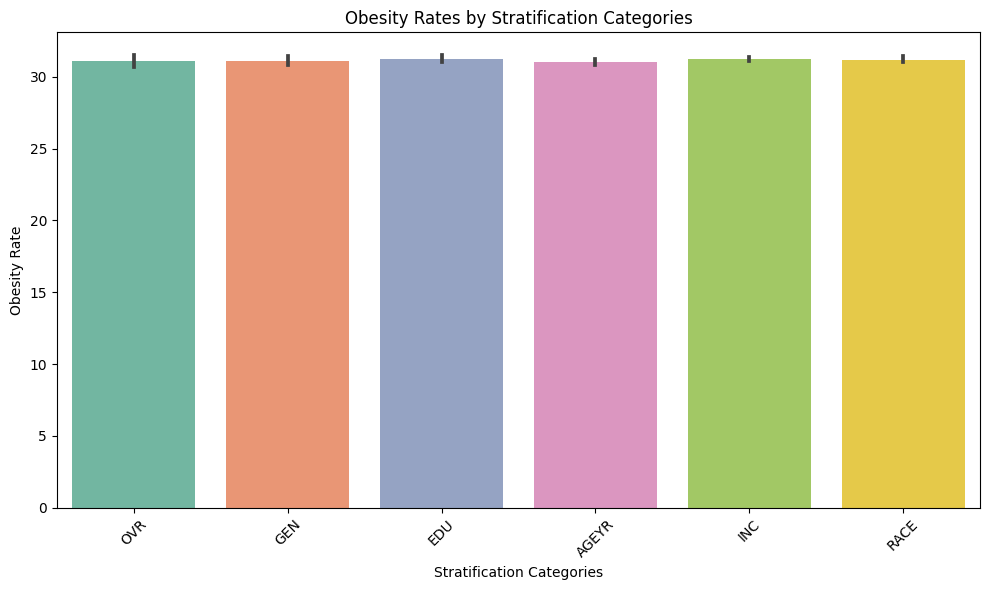

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StratificationCategoryId1', y='Data_Value', data=data, palette='Set2')
plt.title('Obesity Rates by Stratification Categories')
plt.xlabel('Stratification Categories')
plt.ylabel('Obesity Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation**

The plot suggests that obesity rates remain relatively consistent across various StratificationIDs, indicating uniformity in obesity prevalence among different subgroups or categories.

## Obesity counts w.r.t. the Question asked

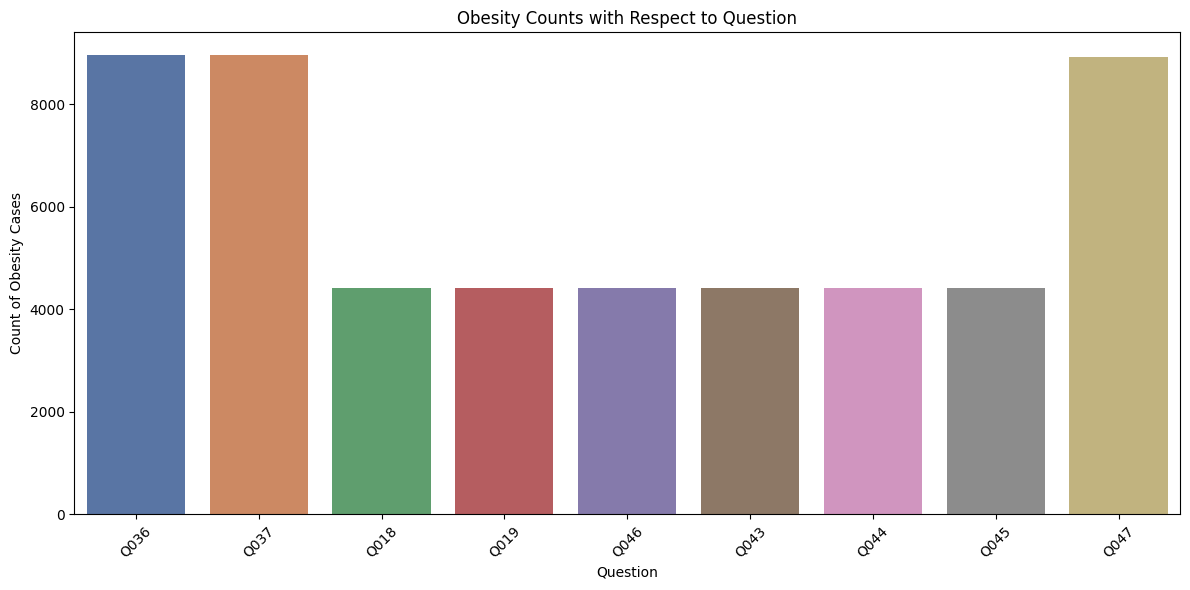

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='QuestionID', data=data, palette='deep')
plt.title('Obesity Counts with Respect to Question')
plt.xlabel('Question')
plt.ylabel('Count of Obesity Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Here QuestionID refers to:**



In [14]:
question_dict = {row['QuestionID']: row['Question'] for index, row in data.iterrows()}

for question_id, question in question_dict.items():
    print(f" {question_id}:{question}")

 Q036:Percent of adults aged 18 years and older who have obesity
 Q037:Percent of adults aged 18 years and older who have an overweight classification
 Q018:Percent of adults who report consuming fruit less than one time daily
 Q019:Percent of adults who report consuming vegetables less than one time daily
 Q046:Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
 Q043:Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
 Q044:Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
 Q045:Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigor

**Observation:**

It's evident that questions Q036, Q037, and Q047 have a notably higher case count compared to the others. These specific questions all revolve around the theme of a non-nutritious diet and lack of physical activity, which are associated with obesity. In contrast, the remaining questions tend to focus on healthier dietary habits and exercise practices.

##Distribution of Topic

<ipython-input-15-bc8eeea9a440>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


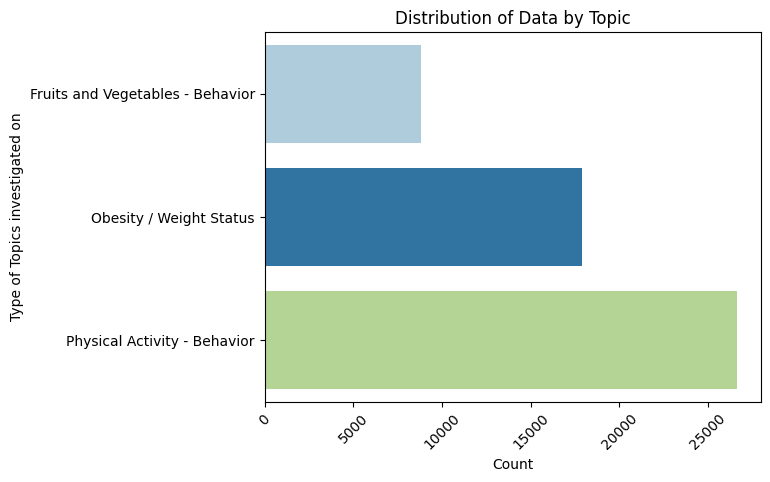

In [15]:
df_by_topic = data.groupby('Topic')
df_by_topic_count = df_by_topic['YearStart'].count()  # Count the occurrences of 'YearStart' per topic
sns.set_palette('Paired')
ax = sns.barplot(x=df_by_topic_count.values, y=df_by_topic_count.index)
ax.set(xlabel='Count', ylabel='Type of Topics investigated on', title='Distribution of Data by Topic')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

**Observation:**

In our analysis, we gain valuable insights. Specifically, we find that physical behavior plays a more significant role in influencing obesity than weight status. Furthermore, it becomes evident that there are fewer individuals in the "Fruits and Vegetables" sections, suggesting that this area may require more attention in promoting healthier habits.

**In conclusion, our observations highlight the importance of addressing physical activity in obesity prevention and call for increased efforts to encourage the consumption of fruits and vegetables to promote a healthier lifestyle.**

##Correlation Analysis


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Category' column
data['LocationAbbr_enc'] = label_encoder.fit_transform(data['LocationAbbr'])
data['LocationDesc_enc'] = label_encoder.fit_transform(data['LocationDesc'])
data['Class_enc'] = label_encoder.fit_transform(data['Class'])
data['Topic_enc'] = label_encoder.fit_transform(data['Topic'])
data['Question_enc'] = label_encoder.fit_transform(data['Question'])
data['ClassID_enc'] = label_encoder.fit_transform(data['ClassID'])
data['TopicID_enc'] = label_encoder.fit_transform(data['TopicID'])
data['QuestionID_enc'] = label_encoder.fit_transform(data['QuestionID'])

In [18]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,StratificationCategoryId1,StratificationID1,LocationAbbr_enc,LocationDesc_enc,Class_enc,Topic_enc,Question_enc,ClassID_enc,TopicID_enc,QuestionID_enc
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,OVR,OVERALL,1,0,1,1,1,1,1,2
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,GEN,MALE,1,0,1,1,1,1,1,2
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,GEN,FEMALE,1,0,1,1,1,1,1,2
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,EDU,EDUHS,1,0,1,1,1,1,1,2
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,EDU,EDUHSGRAD,1,0,1,1,1,1,1,2


In [19]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,LocationAbbr_enc,LocationDesc_enc,Class_enc,Topic_enc,Question_enc,ClassID_enc,TopicID_enc,QuestionID_enc
YearStart,1.000000,1.000000,NaN,-0.001504,-0.001504,-0.006593,0.003190,-0.011121,0.044424,0.002410,0.002934,0.000214,0.000214,-0.069835,0.000214,0.000214,0.014735
YearEnd,1.000000,1.000000,NaN,-0.001504,-0.001504,-0.006593,0.003190,-0.011121,0.044424,0.002410,0.002934,0.000214,0.000214,-0.069835,0.000214,0.000214,0.014735
Data_Value_Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,-0.001504,-0.001504,NaN,1.000000,1.000000,0.956605,0.941565,-0.005854,-0.002525,-0.005652,-0.005990,-0.070273,-0.070273,-0.211741,-0.070273,-0.070273,-0.228394
Data_Value_Alt,-0.001504,-0.001504,NaN,1.000000,1.000000,0.956605,0.941565,-0.005854,-0.002525,-0.005652,-0.005990,-0.070273,-0.070273,-0.211741,-0.070273,-0.070273,-0.228394
Low_Confidence_Limit,-0.006593,-0.006593,NaN,0.956605,0.956605,1.000000,0.804783,0.048949,0.012457,0.011360,0.004161,-0.065362,-0.065362,-0.208965,-0.065362,-0.065362,-0.220495
High_Confidence_Limit,0.003190,0.003190,NaN,0.941565,0.941565,0.804783,1.000000,-0.063228,-0.018078,-0.022855,-0.016043,-0.068970,-0.068970,-0.194868,-0.068970,-0.068970,-0.215320
Sample_Size,-0.011121,-0.011121,NaN,-0.005854,-0.005854,0.048949,-0.063228,1.000000,0.162963,0.118679,0.009701,0.000408,0.000408,0.000755,0.000408,0.000408,0.001500
LocationID,0.044424,0.044424,NaN,-0.002525,-0.002525,0.012457,-0.018078,0.162963,1.000000,0.937207,0.918282,-0.001399,-0.001399,-0.008247,-0.001399,-0.001399,-0.000664
LocationAbbr_enc,0.002410,0.002410,NaN,-0.005652,-0.005652,0.011360,-0.022855,0.118679,0.937207,1.000000,0.981482,-0.000616,-0.000616,-0.001787,-0.000616,-0.000616,-0.000541


**Observation**
*   YearStart and YearEnd have a correlation of 1 hence we can drop one of them i.e. YearStart
*   Data_value and Data_value_Alt have correlation of 1 so we drop Data_value_Alt.
*   We see there is a high correlation between LocationAbbr_enc, LoationDesc_enc, ad LocationID, hence we can keep one of them here LocationAbbr.
*   We see that encoded values of ClassID, TopicID, Class, Topic are highly correlated hence we decide to keep one of them i.e. ClassID





#**RESULT**

The exploratory data analysis (EDA) has provided us with crucial insights, setting the stage for our subsequent prediction phase. Throughout the analysis, we identified meaningful patterns in the distribution of key variables, including Data_Value, Data_Value_Footnote, LocationID, and StratificationCategory1. Our examination of obesity rates across states revealed variations and pinpointed states with the highest obesity prevalence. Furthermore, we observed differences in average obesity rates among different topic categories (Obesity/Weight Status, Fruits and Vegetables, Physical Activity). Notably, the EDA demonstrated consistent obesity rates across various subgroups. Lastly, our recognition of high correlations among certain variables has informed our strategy to streamline the dataset by removing redundant features, a critical step as we move forward to construct predictive models based on these EDA insights.